<a href="https://colab.research.google.com/github/widyadaridhyp/Unlocking-Online-Shopper-Behavior/blob/develop/FINAL_PROJECT_SEABORN_TEAM_stage2_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/widyadaridhyp/Unlocking-Online-Shopper-Behavior/main/dataset.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


# **Pre - EDA**

Cek Missing Files

In [4]:
df.isnull().any()

Administrative              True
Administrative_Duration     True
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration     True
BounceRates                 True
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems            True
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [5]:
#seperate numerical and categorical feature

df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])

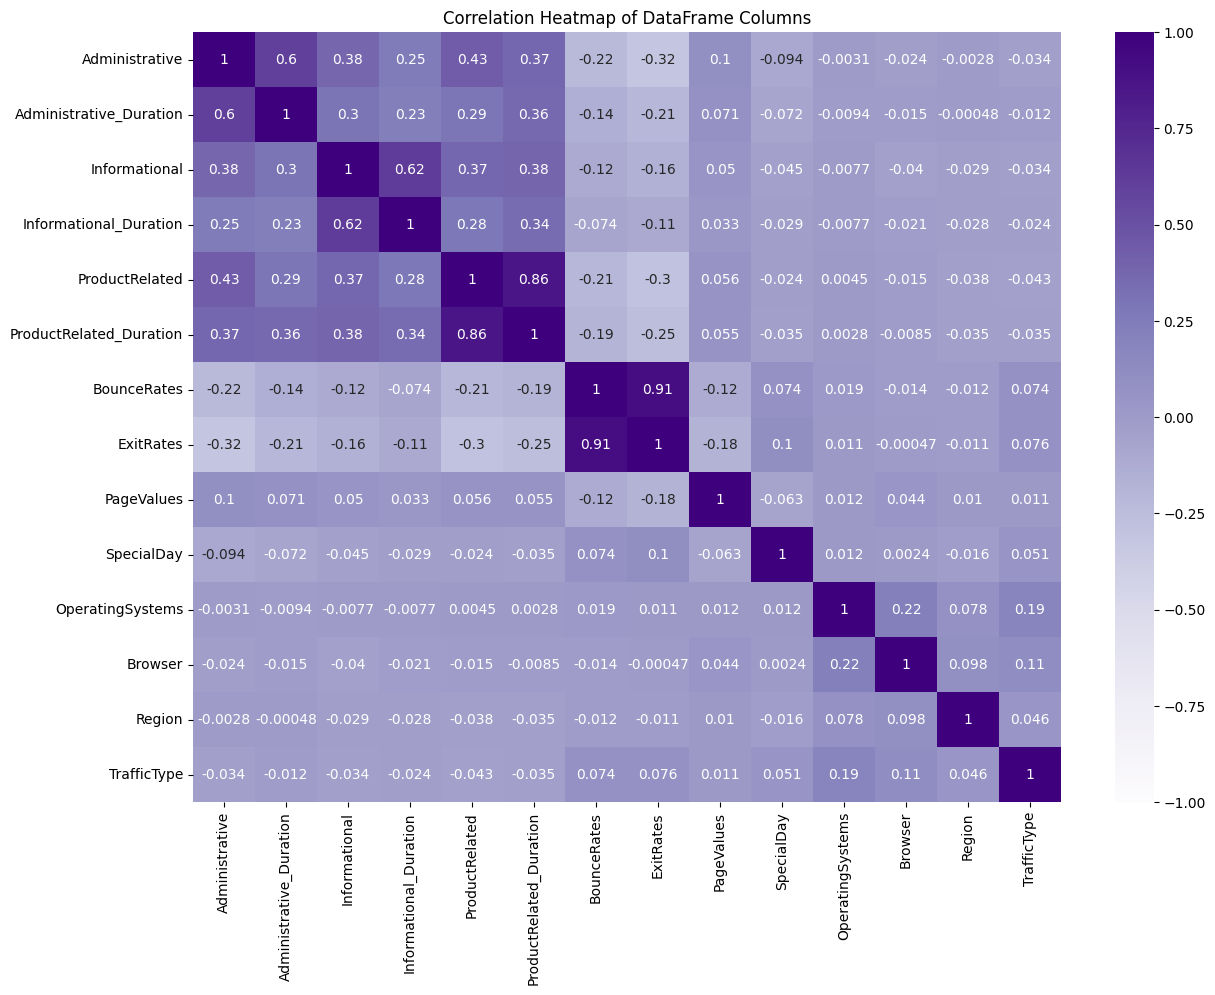

In [6]:
#Correlation between column
corr_matrix = df_num.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

# change column name

In [7]:
# Rename columns with lowercase
def rename_column(col):
  return col.lower()

new_cols = [rename_column(col) for col in df.columns]

# Apply the new column names
df.columns = new_cols

In [8]:
df.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0.0,NaN,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [9]:
#change the column for two word separated with '_'(underscore)
df = df.rename(columns={'productrelated': 'product_related',
                        'productrelated_duration':'product_related_duration',
                        'productrelated_duration':'product_related_duration',
                        'bouncerates':'bounce_rates',
                        'exitrates':'exit_rates',
                        'pagevalues':'page_value',
                        'specialday':'special_day',
                        'operatingsystems': 'operating_systems',
                        'traffictype': 'traffic_type',
                        'visitortype': 'visitor_type'})

In [10]:
df.head(3)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False


**DATA PREPARATION**
- Handle missing values
- Handle duplicated data
- Handle outliers - Bintang
- Feature transformation - Bintang
- Feature encoding - Widya
- Handle class imbalance - Wafi
- Feature Engineering -Fajar

# **Missing Values**

**There is a missing value on column:**
- administrative (nilai null di drop karna kurang dari 1% untuk presentase nya)
- administrative_duration
- product_related_duration
- bounce_rates (nilai null di drop karna kurang dari 1% untuk presentase nya)
- operating_systems

In [11]:
#cek null
df.isnull().sum()

administrative              111
administrative_duration     633
informational                 0
informational_duration        0
product_related               0
product_related_duration    639
bounce_rates                 74
exit_rates                    0
page_value                    0
special_day                   0
month                         0
operating_systems           524
browser                       0
region                        0
traffic_type                  0
visitor_type                  0
weekend                       0
revenue                       0
dtype: int64

In [12]:
#cek percentage Null
df.isnull().sum()/len(df)*100

administrative              0.857408
administrative_duration     4.889541
informational               0.000000
informational_duration      0.000000
product_related             0.000000
product_related_duration    4.935888
bounce_rates                0.571605
exit_rates                  0.000000
page_value                  0.000000
special_day                 0.000000
month                       0.000000
operating_systems           4.047582
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64

Terdapat null value dibawah 2%, sehingga untuk proses treatment null value di lakukan drop untuk **administrative** dan **bounce_rates**



In [13]:
# change Null on administrative where the administrative_duration is Null
#df.loc[(df['administrative'].isnull()) & (df['administrative_duration'].isnull()), ['administrative', 'administrative_duration']]=0

# change Null value on administrative_duration #where administrative is 0
#df.loc[(df['administrative'] == 0) & (df['administrative_duration'].isnull()), 'administrative_duration'] = 0

#change Null value on administrative where administrative_duraiton is 0
#df.loc[(df['administrative'].isnull()) & (df['administrative_duration'] == 0), 'administrative'] = 0

In [14]:
#drop the Null for administrative and bounced rate
df = df.dropna(subset=['administrative', 'bounce_rates'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12762 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12762 non-null  float64
 1   administrative_duration   12142 non-null  float64
 2   informational             12762 non-null  int64  
 3   informational_duration    12762 non-null  float64
 4   product_related           12762 non-null  int64  
 5   product_related_duration  12130 non-null  float64
 6   bounce_rates              12762 non-null  float64
 7   exit_rates                12762 non-null  float64
 8   page_value                12762 non-null  float64
 9   special_day               12762 non-null  float64
 10  month                     12762 non-null  object 
 11  operating_systems         12249 non-null  float64
 12  browser                   12762 non-null  int64  
 13  region                    12762 non-null  int64  
 14  traffic_typ

In [16]:
df.isnull().sum()

administrative                0
administrative_duration     620
informational                 0
informational_duration        0
product_related               0
product_related_duration    632
bounce_rates                  0
exit_rates                    0
page_value                    0
special_day                   0
month                         0
operating_systems           513
browser                       0
region                        0
traffic_type                  0
visitor_type                  0
weekend                       0
revenue                       0
dtype: int64

Untuk  sisa dari missing value pada fitur **administrative duration** dan **product related duration** akan dilakukan pengisian dengan asumsi:

- **product related duration** = product related * 120  
- **administrative duration** = admnistrative * 120

hal ini diasumsikan, untuk setiap page yang dikunjungi memiliki waktu selama 120 detik atau 2 menit.

untuk fitur **operating systems** akan di drop.

In [17]:
# to fill Null value on administrative_duration
df.loc[df['administrative_duration'].isnull(), 'administrative_duration'] = df['administrative'] * 120

In [18]:
# to fill Null value on product_related_duration
df.loc[(df['product_related_duration'].isnull()),'product_related_duration'] = df['product_related'] * 120

In [19]:
# fill Null value on product_related_duration where product_related is 0
#df.loc[(df['product_related']==0) & (df['product_related_duration'].isnull()),'product_related_duration'] = 0

In [20]:
# filling the operating systems column null value
#df['operating_systems'].fillna(df['operating_systems'].mode()[0], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12762 entries, 0 to 12945
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12762 non-null  float64
 1   administrative_duration   12762 non-null  float64
 2   informational             12762 non-null  int64  
 3   informational_duration    12762 non-null  float64
 4   product_related           12762 non-null  int64  
 5   product_related_duration  12762 non-null  float64
 6   bounce_rates              12762 non-null  float64
 7   exit_rates                12762 non-null  float64
 8   page_value                12762 non-null  float64
 9   special_day               12762 non-null  float64
 10  month                     12762 non-null  object 
 11  operating_systems         12249 non-null  float64
 12  browser                   12762 non-null  int64  
 13  region                    12762 non-null  int64  
 14  traffic_typ

# Duplicated

In [22]:
#cek duplicates
df.duplicated().sum()/len(df)*100

5.571227080394922

In [23]:
#drop the duplicates
df= df.drop_duplicates()

In [24]:
df.duplicated().any()

False

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12051 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            12051 non-null  float64
 1   administrative_duration   12051 non-null  float64
 2   informational             12051 non-null  int64  
 3   informational_duration    12051 non-null  float64
 4   product_related           12051 non-null  int64  
 5   product_related_duration  12051 non-null  float64
 6   bounce_rates              12051 non-null  float64
 7   exit_rates                12051 non-null  float64
 8   page_value                12051 non-null  float64
 9   special_day               12051 non-null  float64
 10  month                     12051 non-null  object 
 11  operating_systems         11555 non-null  float64
 12  browser                   12051 non-null  int64  
 13  region                    12051 non-null  int64  
 14  traffic_typ

# Handle outliers

In [26]:
category = ['special_day', 'month', 'operating_systems', 'browser', 'region', 'traffic_type', 'visitor_type', 'weekend', 'revenue']
numeric = ['administrative','administrative_duration', 'informational', 'informational_duration', 'product_related',
           'product_related_duration', 'bounce_rates', 'exit_rates', 'page_value']

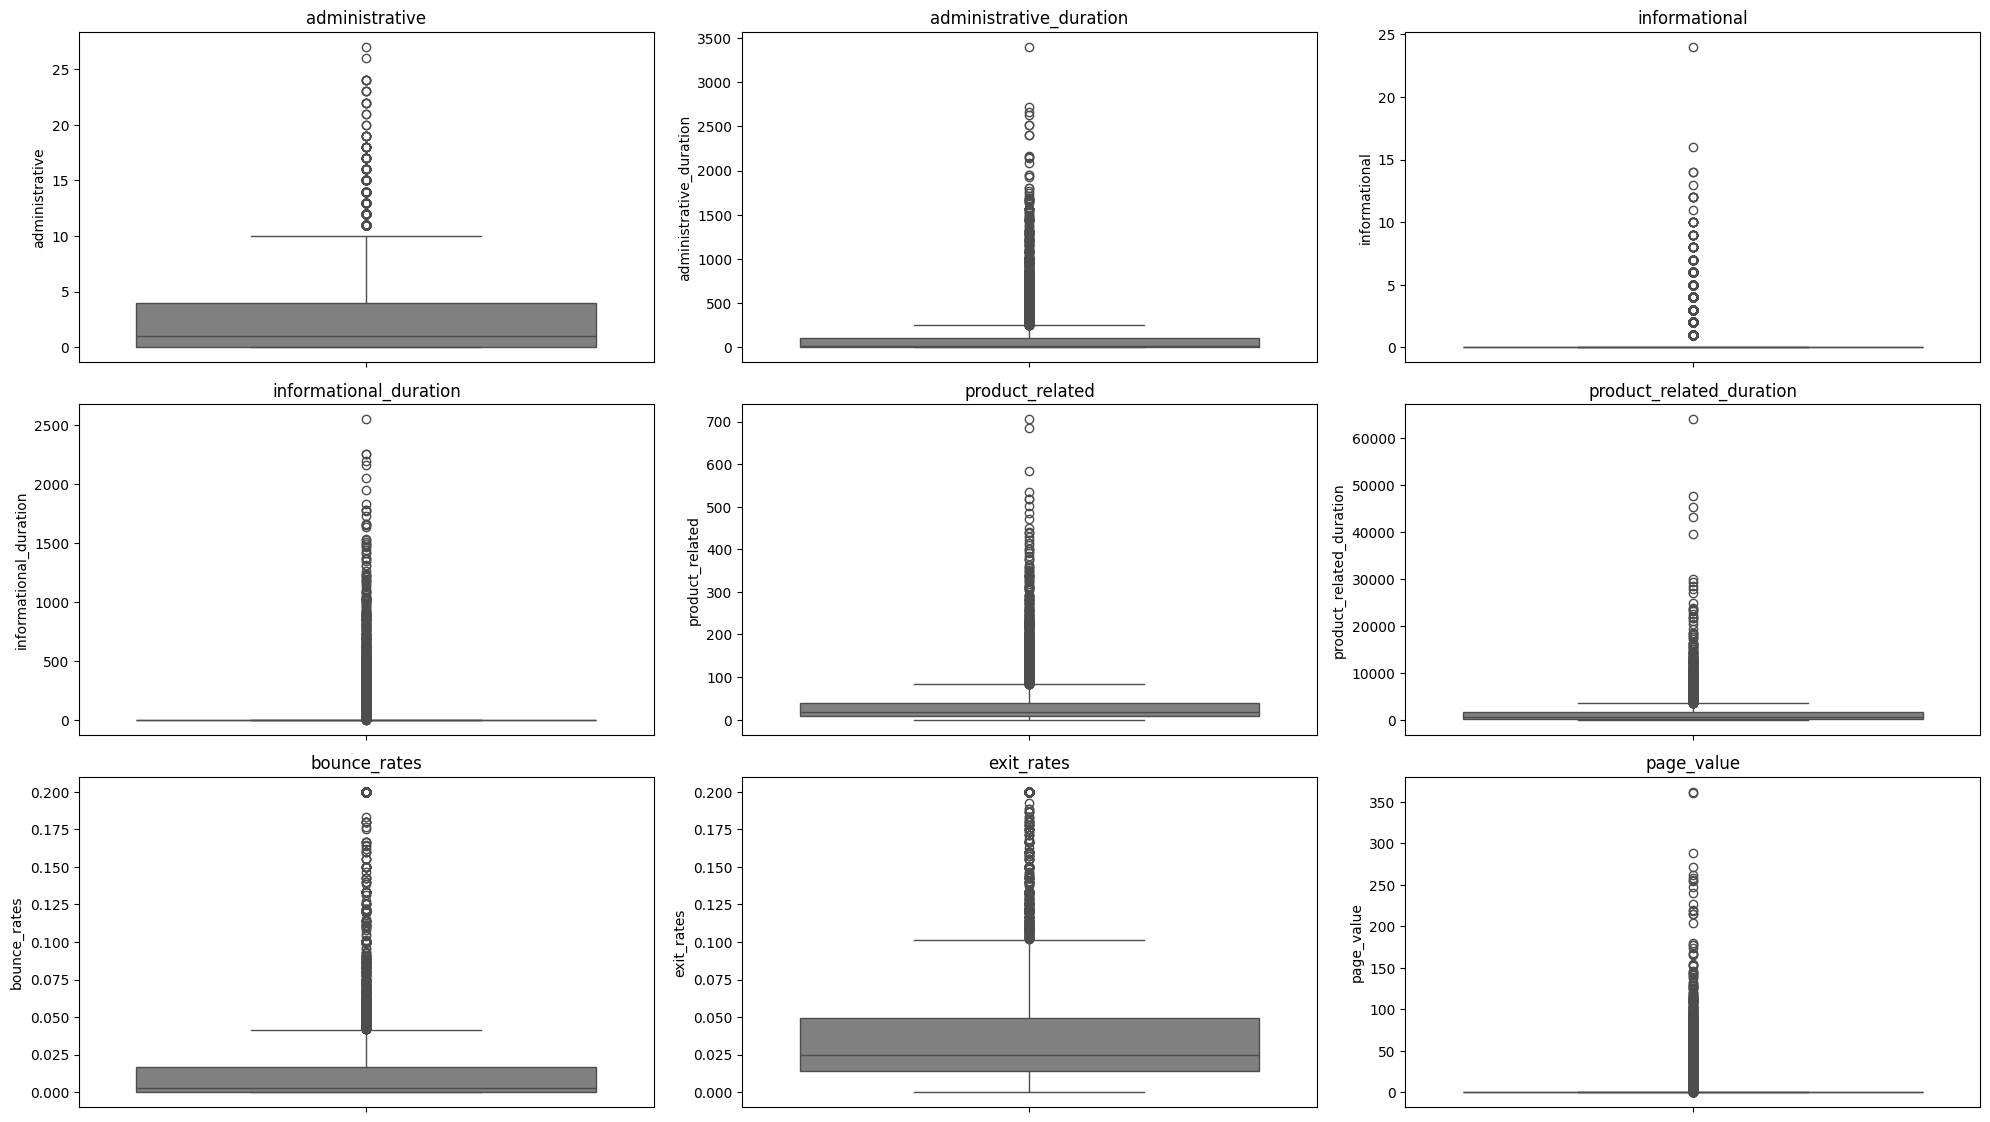

In [27]:
# Menentukan ukuran figure secara keseluruhan
plt.figure(figsize=(20, 15))

for i in range(len(numeric)):
    plt.subplot(len(numeric) // 3 + 1, 3, i + 1)  # Mengatur subplot menjadi beberapa baris
    sns.boxplot(y=df[numeric[i]], color='gray', orient='v')
    plt.title(numeric[i])  # Menambahkan judul pada setiap subplot

plt.tight_layout()
plt.show()

In [28]:
#outliers of bounce_rates column
Q1_bounce_rates = df['bounce_rates'].quantile(0.25)
Q3_bounce_rates = df['bounce_rates'].quantile(0.75)
IQR_bounce_rates = Q3_bounce_rates - Q1_bounce_rates
lower_bound_br = Q1_bounce_rates - 1.5 * IQR_bounce_rates
upper_bound_br = Q3_bounce_rates + 1.5 * IQR_bounce_rates

#outliers of exit_rates column
Q1_exit_rates = df['exit_rates'].quantile(0.25)
Q3_exit_rates = df['exit_rates'].quantile(0.75)
IQR_exit_rates = Q3_exit_rates - Q1_exit_rates
lower_bound_er = Q1_exit_rates - 1.5 * IQR_exit_rates
upper_bound_er = Q3_exit_rates + 1.5 * IQR_exit_rates

In [29]:
#check the percentage of total rows and outliers rows in bounce rates column
rate_outlier_bounced = df[(df['bounce_rates']<=lower_bound_br) | (df['bounce_rates']>=upper_bound_br)]['bounce_rates'].count()/df['bounce_rates'].count()
rate_outlier_bounced

0.11857937100655547

In [30]:
#check the percentage of total rows and outliers rows in exit rates column
rate_outlier_exit = df[(df['exit_rates']<=lower_bound_er) | (df['exit_rates']>=upper_bound_er)]['exit_rates'].count()/df['product_related'].count()
rate_outlier_exit

0.08190191685337317

In [31]:
# Hapus outliers bounce rate menggunakan batas bawah dan atas yang telah dihitung
#df_cleaned_filtered =df_no_outliers = df[(df['bounce_rates'] >= lower_bound_br) & (df['bounce_rates'] <= upper_bound_br)]

# Hapus outliers exit rate menggunakan batas bawah dan atas yang telah dihitung
df_cleaned_filtered =df_no_outliers = df[(df['exit_rates'] >= lower_bound_br) & (df['exit_rates'] <= upper_bound_br)]

outlier yang d

In [32]:
# Plot boxplot sebelum dan sesudah menghapus outliers
#plt.figure(figsize=(12, 6))

#plt.subplot(1, 2, 1)
#sns.boxplot(y=df['bounce_rates'])
#plt.title('Boxplot Bounce Rates (Before Removing Outliers)')

#plt.subplot(1, 2, 2)
#sns.boxplot(y=df_cleaned_filtered['bounce_rates'])
#plt.title('Boxplot Bounce Rates (After Removing Outliers)')

#plt.tight_layout()
#plt.show()

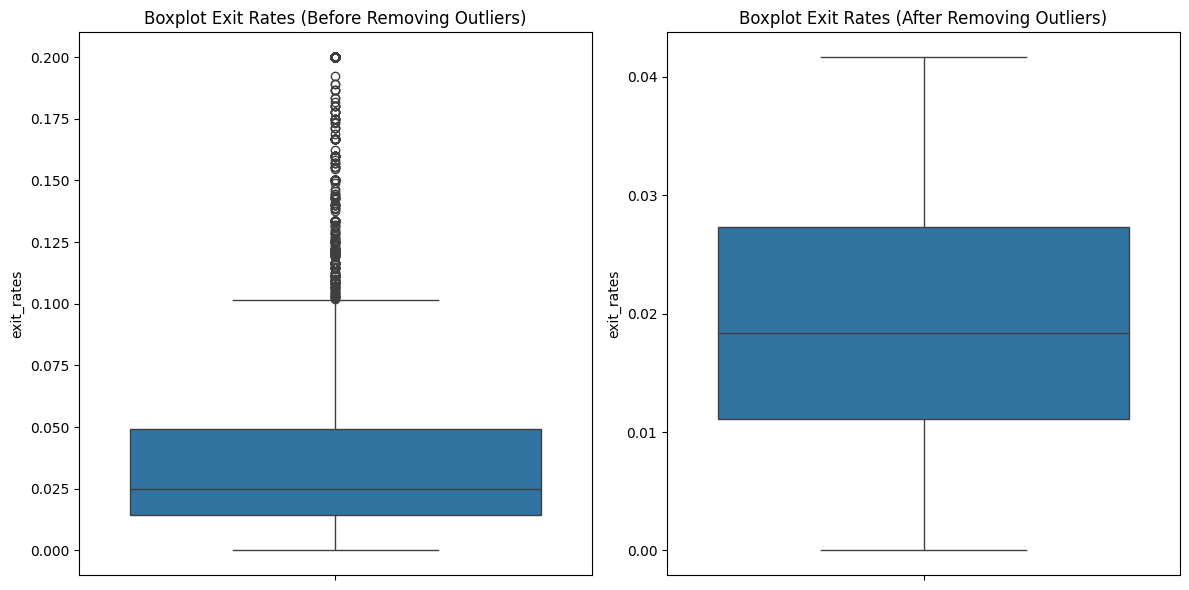

In [33]:
# Plot boxplot sebelum dan sesudah menghapus outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['exit_rates'])
plt.title('Boxplot Exit Rates (Before Removing Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned_filtered['exit_rates'])
plt.title('Boxplot Exit Rates (After Removing Outliers)')

plt.tight_layout()
plt.show()

In [34]:
df_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8555 entries, 5 to 12328
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   administrative            8555 non-null   float64
 1   administrative_duration   8555 non-null   float64
 2   informational             8555 non-null   int64  
 3   informational_duration    8555 non-null   float64
 4   product_related           8555 non-null   int64  
 5   product_related_duration  8555 non-null   float64
 6   bounce_rates              8555 non-null   float64
 7   exit_rates                8555 non-null   float64
 8   page_value                8555 non-null   float64
 9   special_day               8555 non-null   float64
 10  month                     8555 non-null   object 
 11  operating_systems         8194 non-null   float64
 12  browser                   8555 non-null   int64  
 13  region                    8555 non-null   int64  
 14  traffic_type

# Split Data

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = df_cleaned_filtered.drop(['operating_systems','revenue'], axis=1)
y = df_cleaned_filtered['revenue']

In [37]:
# Pisahkan data ke dalam set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature transformation

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

## Data Training

In [40]:
data = x_train.copy()

In [41]:
# Melakukan standarisasi pada fitur yang ditentukan dan menambahkannya ke DataFrame
data['administrative_std'] = scaler.fit_transform(x_train['administrative'].values.reshape(-1, 1))
data['administrative_duration_std'] = scaler.fit_transform(x_train['administrative_duration'].values.reshape(-1, 1))
data['informational_std'] = scaler.fit_transform(x_train['informational'].values.reshape(-1, 1))
data['informational_duration_std'] = scaler.fit_transform(x_train['informational_duration'].values.reshape(-1, 1))
data['product_related_std'] = scaler.fit_transform(x_train['product_related'].values.reshape(-1, 1))
data['product_related_duration_std'] = scaler.fit_transform(x_train['product_related_duration'].values.reshape(-1, 1))
data['bounce_rates_std'] = scaler.fit_transform(x_train['bounce_rates'].values.reshape(-1, 1))
data['exit_rates_std'] = scaler.fit_transform(x_train['exit_rates'].values.reshape(-1, 1))
data['page_value_std'] = scaler.fit_transform(x_train['page_value'].values.reshape(-1, 1))

In [42]:
data.describe()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,...,traffic_type,administrative_std,administrative_duration_std,informational_std,informational_duration_std,product_related_std,product_related_duration_std,bounce_rates_std,exit_rates_std,page_value_std
count,6844.000000,6844.000000,6844.000000,6844.00000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,...,6844.000000,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03
mean,3.038866,117.360939,0.652835,46.13835,40.232174,1654.445057,0.004578,0.019380,8.022033,0.044039,...,3.813852,3.114594e-17,5.710089e-17,-5.294810e-17,3.322234e-17,5.502450e-17,2.076396e-18,7.890305e-17,-1.183546e-16,-9.058278e-17
std,3.569269,223.096226,1.425798,162.52179,49.472211,2530.003641,0.007064,0.010572,21.287651,0.170945,...,3.742845,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-8.514594e-01,-5.260937e-01,-4.579066e-01,-2.839110e-01,-8.132872e-01,-6.539777e-01,-6.480842e-01,-1.833343e+00,-3.768673e-01
25%,0.000000,0.000000,0.000000,0.00000,12.000000,391.966667,0.000000,0.011111,0.000000,0.000000,...,2.000000,-8.514594e-01,-5.260937e-01,-4.579066e-01,-2.839110e-01,-5.707090e-01,-4.990391e-01,-6.480842e-01,-7.822543e-01,-3.768673e-01
50%,2.000000,43.645833,0.000000,0.00000,25.000000,898.624956,0.000000,0.018254,0.000000,0.000000,...,2.000000,-2.910797e-01,-3.304426e-01,-4.579066e-01,-2.839110e-01,-3.079160e-01,-2.987645e-01,-6.480842e-01,-1.065543e-01,-3.768673e-01
75%,5.000000,136.541667,1.000000,3.00000,48.000000,1966.514290,0.007351,0.027273,4.515718,0.000000,...,4.000000,5.494898e-01,8.598141e-02,2.435063e-01,-2.654506e-01,1.570254e-01,1.233564e-01,3.925491e-01,7.466023e-01,-1.647233e-01
max,24.000000,3398.750000,24.000000,2549.37500,705.000000,63973.522230,0.057143,0.041667,361.763742,1.000000,...,20.000000,5.873097e+00,1.470948e+01,1.637600e+01,1.540359e+01,1.343818e+01,2.463381e+01,7.441716e+00,2.108240e+00,1.661844e+01


In [43]:
#menunjukan hasil data yang sudah di standarisasi
data[['administrative_std','administrative_duration_std', 'informational_std', 'informational_duration_std','product_related_std',
      'product_related_duration_std', 'bounce_rates_std', 'exit_rates_std', 'page_value_std']].describe()

,administrative_std,administrative_duration_std,informational_std,informational_duration_std,product_related_std,product_related_duration_std,bounce_rates_std,exit_rates_std,page_value_std
count,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03
mean,3.114594e-17,5.710089e-17,-5.294810e-17,3.322234e-17,5.502450e-17,2.076396e-18,7.890305e-17,-1.183546e-16,-9.058278e-17
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-8.514594e-01,-5.260937e-01,-4.579066e-01,-2.839110e-01,-8.132872e-01,-6.539777e-01,-6.480842e-01,-1.833343e+00,-3.768673e-01
25%,-8.514594e-01,-5.260937e-01,-4.579066e-01,-2.839110e-01,-5.707090e-01,-4.990391e-01,-6.480842e-01,-7.822543e-01,-3.768673e-01
50%,-2.910797e-01,-3.304426e-01,-4.579066e-01,-2.839110e-01,-3.079160e-01,-2.987645e-01,-6.480842e-01,-1.065543e-01,-3.768673e-01
75%,5.494898e-01,8.598141e-02,2.435063e-01,-2.654506e-01,1.570254e-01,1.233564e-01,3.925491e-01,7.466023e-01,-1.647233e-01
max,5.873097e+00,1.470948e+01,1.637600e+01,1.540359e+01,1.343818e+01,2.463381e+01,7.441716e+00,2.108240e+00,1.661844e+01


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 10013 to 10591
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                6844 non-null   float64
 1   administrative_duration       6844 non-null   float64
 2   informational                 6844 non-null   int64  
 3   informational_duration        6844 non-null   float64
 4   product_related               6844 non-null   int64  
 5   product_related_duration      6844 non-null   float64
 6   bounce_rates                  6844 non-null   float64
 7   exit_rates                    6844 non-null   float64
 8   page_value                    6844 non-null   float64
 9   special_day                   6844 non-null   float64
 10  month                         6844 non-null   object 
 11  browser                       6844 non-null   int64  
 12  region                        6844 non-null   int64  
 13  tra

In [45]:
data.isnull().any()

administrative                  False
administrative_duration         False
informational                   False
informational_duration          False
product_related                 False
product_related_duration        False
bounce_rates                    False
exit_rates                      False
page_value                      False
special_day                     False
month                           False
browser                         False
region                          False
traffic_type                    False
visitor_type                    False
weekend                         False
administrative_std              False
administrative_duration_std     False
informational_std               False
informational_duration_std      False
product_related_std             False
product_related_duration_std    False
bounce_rates_std                False
exit_rates_std                  False
page_value_std                  False
dtype: bool

## Data Testing

In [46]:
data1 = x_test.copy()

In [47]:
# Melakukan standarisasi pada fitur yang ditentukan dan menambahkannya ke DataFrame
data1['administrative_std'] = scaler.fit_transform(x_test['administrative'].values.reshape(-1, 1))
data1['administrative_duration_std'] = scaler.fit_transform(x_test['administrative_duration'].values.reshape(-1, 1))
data1['informational_std'] = scaler.fit_transform(x_test['informational'].values.reshape(-1, 1))
data1['informational_duration_std'] = scaler.fit_transform(x_test['informational_duration'].values.reshape(-1, 1))
data1['product_related_std'] = scaler.fit_transform(x_test['product_related'].values.reshape(-1, 1))
data1['product_related_duration_std'] = scaler.fit_transform(x_test['product_related_duration'].values.reshape(-1, 1))
data1['bounce_rates_std'] = scaler.fit_transform(x_test['bounce_rates'].values.reshape(-1, 1))
data1['exit_rates_std'] = scaler.fit_transform(x_test['exit_rates'].values.reshape(-1, 1))
data1['page_value_std'] = scaler.fit_transform(x_test['page_value'].values.reshape(-1, 1))

In [48]:
data1.describe()

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,...,traffic_type,administrative_std,administrative_duration_std,informational_std,informational_duration_std,product_related_std,product_related_duration_std,bounce_rates_std,exit_rates_std,page_value_std
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,...,1711.000000,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03,1.711000e+03
mean,2.944477,112.404735,0.627119,40.046241,40.527762,1634.405145,0.004571,0.019590,8.032778,0.043483,...,4.047341,-2.699315e-17,4.152792e-18,1.142018e-17,4.775711e-17,-2.076396e-17,1.328893e-16,-6.436828e-17,2.865427e-16,2.076396e-17
std,3.599848,201.659390,1.444510,139.853058,49.840239,2244.403373,0.007047,0.010602,22.509621,0.169976,...,3.830408,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00,1.000292e+00
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,-8.181840e-01,-5.575619e-01,-4.342663e-01,-2.864288e-01,-7.933212e-01,-7.284265e-01,-6.487401e-01,-1.848288e+00,-3.569641e-01
25%,0.000000,0.000000,0.000000,0.000000,13.000000,423.500000,0.000000,0.011443,0.000000,0.000000,...,2.000000,-8.181840e-01,-5.575619e-01,-4.342663e-01,-2.864288e-01,-5.524815e-01,-5.396798e-01,-6.487401e-01,-7.686398e-01,-3.569641e-01
50%,2.000000,42.000000,0.000000,0.000000,25.000000,918.541667,0.000000,0.018798,0.000000,0.000000,...,2.000000,-2.624425e-01,-3.492291e-01,-4.342663e-01,-2.864288e-01,-3.116418e-01,-3.190482e-01,-6.487401e-01,-7.475583e-02,-3.569641e-01
75%,5.000000,138.125000,1.000000,0.000000,48.000000,1922.551190,0.007269,0.027416,4.519715,0.000000,...,4.000000,5.711697e-01,1.275804e-01,2.582124e-01,-2.864288e-01,1.499676e-01,1.284218e-01,3.829810e-01,7.383093e-01,-1.561150e-01
max,27.000000,1687.500000,16.000000,2252.033333,584.000000,27009.859430,0.046154,0.041667,360.953384,1.000000,...,20.000000,6.684326e+00,7.812955e+00,1.064539e+01,1.582113e+01,1.090747e+01,1.130941e+01,5.902221e+00,2.082812e+00,1.568324e+01


In [49]:
#menunjukan hasil data yang sudah di normalisasi
data[['administrative_std','administrative_duration_std', 'informational_std', 'informational_duration_std','product_related_std',
      'product_related_duration_std', 'bounce_rates_std', 'exit_rates_std', 'page_value_std']].describe()

,administrative_std,administrative_duration_std,informational_std,informational_duration_std,product_related_std,product_related_duration_std,bounce_rates_std,exit_rates_std,page_value_std
count,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03,6.844000e+03
mean,3.114594e-17,5.710089e-17,-5.294810e-17,3.322234e-17,5.502450e-17,2.076396e-18,7.890305e-17,-1.183546e-16,-9.058278e-17
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-8.514594e-01,-5.260937e-01,-4.579066e-01,-2.839110e-01,-8.132872e-01,-6.539777e-01,-6.480842e-01,-1.833343e+00,-3.768673e-01
25%,-8.514594e-01,-5.260937e-01,-4.579066e-01,-2.839110e-01,-5.707090e-01,-4.990391e-01,-6.480842e-01,-7.822543e-01,-3.768673e-01
50%,-2.910797e-01,-3.304426e-01,-4.579066e-01,-2.839110e-01,-3.079160e-01,-2.987645e-01,-6.480842e-01,-1.065543e-01,-3.768673e-01
75%,5.494898e-01,8.598141e-02,2.435063e-01,-2.654506e-01,1.570254e-01,1.233564e-01,3.925491e-01,7.466023e-01,-1.647233e-01
max,5.873097e+00,1.470948e+01,1.637600e+01,1.540359e+01,1.343818e+01,2.463381e+01,7.441716e+00,2.108240e+00,1.661844e+01


# Feature Selection: Categorical Data Analysis

Sebelum dilakukan encoding, ingin dicek terlebih dahulu signifikansi variabel independen kategorik terhadap variabel dependen dengan Uji Chi-Square

**Hipotesis:**
* $H_o$: $p_{value}>\alpha$ (Tidak ada hubungan antara variabel independen dan variabel kategorik)
* $H_1$: $p_{value}<\alpha$ (Terdapat hubungan antara variabel independen kategorik dan variabel dependen)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 10013 to 10591
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                6844 non-null   float64
 1   administrative_duration       6844 non-null   float64
 2   informational                 6844 non-null   int64  
 3   informational_duration        6844 non-null   float64
 4   product_related               6844 non-null   int64  
 5   product_related_duration      6844 non-null   float64
 6   bounce_rates                  6844 non-null   float64
 7   exit_rates                    6844 non-null   float64
 8   page_value                    6844 non-null   float64
 9   special_day                   6844 non-null   float64
 10  month                         6844 non-null   object 
 11  browser                       6844 non-null   int64  
 12  region                        6844 non-null   int64  
 13  tra

In [51]:
from scipy.stats import chi2_contingency

## Hubungan visitor_type dengan revenue

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 10013 to 10591
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                6844 non-null   float64
 1   administrative_duration       6844 non-null   float64
 2   informational                 6844 non-null   int64  
 3   informational_duration        6844 non-null   float64
 4   product_related               6844 non-null   int64  
 5   product_related_duration      6844 non-null   float64
 6   bounce_rates                  6844 non-null   float64
 7   exit_rates                    6844 non-null   float64
 8   page_value                    6844 non-null   float64
 9   special_day                   6844 non-null   float64
 10  month                         6844 non-null   object 
 11  browser                       6844 non-null   int64  
 12  region                        6844 non-null   int64  
 13  tra

In [53]:
df_visit = pd.concat([data.visitor_type, y_train], axis=1)

In [54]:
tabel_kontingensi_visitor = df_visit.groupby(['visitor_type', 'revenue']).size().unstack()

In [55]:
tabel_kontingensi_visitor

revenue,False,True
visitor_type,,
New_Visitor,909,306
Other,24,15
Returning_Visitor,4522,1068


In [56]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_visitor)

In [57]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 30.807599354771508
P-Value: 2.0427480272966183e-07
Degrees of Freedom: 2
Expected Frequencies:
[[ 968.41393922  246.58606078]
 [  31.08489188    7.91510812]
 [4455.50116891 1134.49883109]]


Karena $p_{value} = 2.0427480272966183e^{-07} < \alpha = 0,05$, sehingga hasil uji Chi-Square sangat signifikan yang menandakan bahwa terdapat hubungan antara visitor_type dengan revenue. Dengan demikian, jika kita melakukan one hot encoding pada variabel visitor_type pun tidak akan sia-sia karena dapat digunakan pada pemodelan.

## Hubungan special_day dengan revenue

In [58]:
df_spec_rev = pd.concat([data.special_day, y_train], axis=1)

In [59]:
tabel_kontingensi_special_day = df_spec_rev.groupby(['special_day','revenue']).size().unstack(fill_value=0)

In [60]:
tabel_kontingensi_special_day

revenue,False,True
special_day,,
0.0,5003,1337
0.2,73,13
0.4,86,5
0.6,115,20
0.8,119,7
1.0,59,7


In [61]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_special_day)

In [62]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 39.47426895396824
P-Value: 1.9060366256010535e-07
Degrees of Freedom: 5
Expected Frequencies:
[[5053.28755114 1286.71244886]
 [  68.54617183   17.45382817]
 [  72.53141438   18.46858562]
 [ 107.6015488    27.3984512 ]
 [ 100.42811222   25.57188778]
 [  52.60520164   13.39479836]]


Karena $p_{value} =1.9060366256010535e^{-07} < \alpha = 0,05$, sehingga hasil uji Chi-Square sangat signifikan yang menandakan bahwa terdapat hubungan antara special_day dengan revenue. Dengan demikian, kita dapat mempertimbangkan fitur ini untuk pemodelan

## Hubungan region dengan revenue

In [63]:
df_reg_rev = pd.concat([data.region, y_train], axis=1)

In [64]:
tabel_kontingensi_region = df_reg_rev.groupby(['region','revenue']).size().unstack(fill_value=0)

In [65]:
tabel_kontingensi_region

revenue,False,True
region,,
1,2113,574
2,491,132
3,1048,247
4,537,135
5,145,40
6,338,81
7,366,81
8,201,32
9,216,67


In [66]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_region)

In [67]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 13.357858098858815
P-Value: 0.10011567502189389
Degrees of Freedom: 8
Expected Frequencies:
[[2141.66934541  545.33065459]
 [ 496.56122151  126.43877849]
 [1032.17781999  262.82218001]
 [ 535.61659848  136.38340152]
 [ 147.45397428   37.54602572]
 [ 333.96332554   85.03667446]
 [ 356.28068381   90.71931619]
 [ 185.71230275   47.28769725]
 [ 225.56472823   57.43527177]]


Karena $p_{value} = 0.10011567502189389 > \alpha = 0,05$, sehingga hasil uji Chi-Square tidak sangat signifikan yang menandakan bahwa tidak terdapat hubungan antara region dengan revenue. Dengan demikian, kita dapat mempertimbangkan bisa jika tidak menggunakan fitur ini dalam pemodelan

## Hubungan traffic_type dengan revenue

In [68]:
df_traf_rev = pd.concat([data.traffic_type, y_train], axis=1)

In [69]:
tabel_kontingensi_traffic = df_traf_rev.groupby(['traffic_type','revenue']).size().unstack(fill_value=0)

In [70]:
tabel_kontingensi_traffic

revenue,False,True
traffic_type,,
1,985,178
2,2055,645
3,792,125
4,509,117
5,131,38
6,191,42
7,18,9
8,134,58
9,20,2


In [71]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_traffic)

In [72]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 121.13085867720966
P-Value: 9.387816291320646e-18
Degrees of Freedom: 17
Expected Frequencies:
[[9.26967417e+02 2.36032583e+02]
 [2.15203098e+03 5.47969024e+02]
 [7.30893483e+02 1.86106517e+02]
 [4.98952367e+02 1.27047633e+02]
 [1.34701198e+02 3.42988019e+01]
 [1.85712303e+02 4.72876973e+01]
 [2.15203098e+01 5.47969024e+00]
 [1.53033314e+02 3.89666861e+01]
 [1.75350672e+01 4.46493279e+00]
 [2.12014904e+02 5.39850964e+01]
 [1.01225161e+02 2.57748393e+01]
 [2.08826710e+02 5.31732905e+01]
 [8.76753361e+00 2.23246639e+00]
 [8.76753361e+00 2.23246639e+00]
 [1.59409702e+00 4.05902981e-01]
 [3.98524255e+00 1.01475745e+00]
 [4.78229106e+00 1.21770894e+00]
 [8.36900935e+01 2.13099065e+01]]


Karena $p_{value} = 9.387816291320646e^{-18} < \alpha = 0,05 $, sehingga hasil uji Chi-Square angat signifikan yang menandakan bahwa terdapat hubungan antara traffic_type dengan revenue. Dengan demikian, kita dapat mempertimbangkan bisa jika untuk menggunakan fitur ini dalam pemodelan

## Hubungan month dengan revenue

In [73]:
df_month_rev = pd.concat([data.month, y_train], axis=1)

In [74]:
tabel_kontingensi_month = df_month_rev.groupby(['month','revenue']).size().unstack(fill_value=0)

In [75]:
tabel_kontingensi_month

revenue,False,True
month,,
Aug,211,55
Dec,831,153
Feb,66,1
Jul,180,37
June,102,23
Mar,887,134
May,1412,266
Nov,1253,577
Oct,282,80


In [76]:
chi2, p, dof, ex=chi2_contingency(tabel_kontingensi_month)

In [77]:
print(f"Chi-Square: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

Chi-Square: 226.748881086989
P-Value: 7.957190719851932e-44
Degrees of Freedom: 9
Expected Frequencies:
[[ 212.01490357   53.98509643]
 [ 784.29573349  199.70426651]
 [  53.40225015   13.59774985]
 [ 172.95952659   44.04047341]
 [  99.63106371   25.36893629]
 [ 813.78652835  207.21347165]
 [1337.44739918  340.55260082]
 [1458.59877265  371.40122735]
 [ 288.53156049   73.46843951]
 [ 234.33226184   59.66773816]]


Karena $p_{value} = 7.957190719851932e^{-44} < \alpha = 0,05 $, sehingga hasil uji Chi-Square angat signifikan yang menandakan bahwa terdapat hubungan antara month dengan revenue. Dengan demikian, kita dapat mempertimbangkan bisa jika untuk menggunakan fitur ini dalam pemodelan

# Feature encoding

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 10013 to 10591
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                6844 non-null   float64
 1   administrative_duration       6844 non-null   float64
 2   informational                 6844 non-null   int64  
 3   informational_duration        6844 non-null   float64
 4   product_related               6844 non-null   int64  
 5   product_related_duration      6844 non-null   float64
 6   bounce_rates                  6844 non-null   float64
 7   exit_rates                    6844 non-null   float64
 8   page_value                    6844 non-null   float64
 9   special_day                   6844 non-null   float64
 10  month                         6844 non-null   object 
 11  browser                       6844 non-null   int64  
 12  region                        6844 non-null   int64  
 13  tra

## Training

### Feature Encoding pada 'month'

In [79]:
data.month.unique()

array(['Nov', 'Mar', 'Dec', 'Aug', 'May', 'June', 'Oct', 'Jul', 'Feb',
       'Sep'], dtype=object)

In [80]:
# Define a mapping from month abbreviations to integer values
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [81]:
data['month_encode'] = data['month'].map(month_mapping)

In [82]:
data[data['month_encode'].isnull()]

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_value,special_day,...,administrative_std,administrative_duration_std,informational_std,informational_duration_std,product_related_std,product_related_duration_std,bounce_rates_std,exit_rates_std,page_value_std,month_encode


In [83]:
#drop month feature
data.drop(['month'], axis=1, inplace=True)

In [84]:
data.isnull().any()

administrative                  False
administrative_duration         False
informational                   False
informational_duration          False
product_related                 False
product_related_duration        False
bounce_rates                    False
exit_rates                      False
page_value                      False
special_day                     False
browser                         False
region                          False
traffic_type                    False
visitor_type                    False
weekend                         False
administrative_std              False
administrative_duration_std     False
informational_std               False
informational_duration_std      False
product_related_std             False
product_related_duration_std    False
bounce_rates_std                False
exit_rates_std                  False
page_value_std                  False
month_encode                    False
dtype: bool

### Feature Encoding pada'visitor_type'

In [85]:
data.visitor_type.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 10013 to 10591
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   administrative                6844 non-null   float64
 1   administrative_duration       6844 non-null   float64
 2   informational                 6844 non-null   int64  
 3   informational_duration        6844 non-null   float64
 4   product_related               6844 non-null   int64  
 5   product_related_duration      6844 non-null   float64
 6   bounce_rates                  6844 non-null   float64
 7   exit_rates                    6844 non-null   float64
 8   page_value                    6844 non-null   float64
 9   special_day                   6844 non-null   float64
 10  browser                       6844 non-null   int64  
 11  region                        6844 non-null   int64  
 12  traffic_type                  6844 non-null   int64  
 13  vis

In [87]:
# One-hot encoding untuk kolom 'visitor_type'
data = pd.get_dummies(data, columns=['visitor_type'], prefix='visitor_type')

In [88]:
data.columns

Index(['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'product_related', 'product_related_duration',
       'bounce_rates', 'exit_rates', 'page_value', 'special_day', 'browser',
       'region', 'traffic_type', 'weekend', 'administrative_std',
       'administrative_duration_std', 'informational_std',
       'informational_duration_std', 'product_related_std',
       'product_related_duration_std', 'bounce_rates_std', 'exit_rates_std',
       'page_value_std', 'month_encode', 'visitor_type_New_Visitor',
       'visitor_type_Other', 'visitor_type_Returning_Visitor'],
      dtype='object')

In [89]:
data = data.drop('visitor_type_Other', axis=1)

In [90]:
data.columns = data.columns.str.lower()

In [91]:
data['visitor_type_new_visitor'] = data['visitor_type_new_visitor'].replace({True: 1, False: 0})
data['visitor_type_returning_visitor'] = data['visitor_type_returning_visitor'].replace({True: 1, False: 0})

In [92]:
data.columns

Index(['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'product_related', 'product_related_duration',
       'bounce_rates', 'exit_rates', 'page_value', 'special_day', 'browser',
       'region', 'traffic_type', 'weekend', 'administrative_std',
       'administrative_duration_std', 'informational_std',
       'informational_duration_std', 'product_related_std',
       'product_related_duration_std', 'bounce_rates_std', 'exit_rates_std',
       'page_value_std', 'month_encode', 'visitor_type_new_visitor',
       'visitor_type_returning_visitor'],
      dtype='object')

### Feature Encoding pada 'weekend' dan 'revenue'

In [93]:
data.weekend.unique()

array([ True, False])

In [94]:
#change weekend into 1 and 0
data['weekend'] = data['weekend'].replace({True: 1, False: 0})

In [95]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6844 entries, 10013 to 10591
Series name: revenue
Non-Null Count  Dtype
--------------  -----
6844 non-null   bool 
dtypes: bool(1)
memory usage: 60.2 KB


In [96]:
#change column revenue into 1 and 0
y_train = y_train.replace({True:1, False:0})

In [97]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 1711 entries, 8886 to 2921
Series name: revenue
Non-Null Count  Dtype
--------------  -----
1711 non-null   bool 
dtypes: bool(1)
memory usage: 15.0 KB


## Testing

### Feature Encoding: month

In [98]:
data1['month_encode'] = data1['month'].map(month_mapping)

In [99]:
#drop month feature
data1.drop(['month'], axis=1, inplace=True)

### Feature Encoding: visitor_type

In [100]:
# One-hot encoding untuk kolom 'visitor_type'
data1 = pd.get_dummies(data1, columns=['visitor_type'], prefix='visitor_type')

In [101]:
data1 = data1.drop('visitor_type_Other', axis=1)

In [102]:
data1.columns = data1.columns.str.lower()

In [103]:
data1['visitor_type_new_visitor'] = data1['visitor_type_new_visitor'].replace({True: 1, False: 0})
data1['visitor_type_returning_visitor'] = data1['visitor_type_returning_visitor'].replace({True: 1, False: 0})

### Feature Encoding: weekend dan revenue

In [104]:
#change weekend into 1 and 0
data1['weekend'] = data1['weekend'].replace({True: 1, False: 0})

In [105]:
y_test = y_test.replace({True:1, False:0})

# Handle class imbalance

In [106]:
from imblearn.over_sampling import SMOTE

In [107]:
data['revenue'].value_counts()

KeyError: 'revenue'

In [ ]:
data_try = data.copy()

In [ ]:
x = data_try.drop('revenue', axis=1)
y = data_try['revenue']

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
print('x_resampled size=',x_resampled.shape)
print('y_resampled size=',y_resampled.shape)

In [ ]:
y_resampled.value_counts()

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Pisahkan data ke dalam set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Instansiasi objek SMOTE dan sampel ulang set pelatihan saja
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

### Modelling dengan SMOTE

In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(x_train_smote, y_train_smote)

xgb.score(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Train the model
model2 = RandomForestClassifier(random_state=42)
model2.fit(x_train, y_train)

In [ ]:
# Make predictions
y_pred = model2.predict(x_test)

In [ ]:
# Evaluate the model
print("Without SMOTE:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

In [ ]:
#modeling dengan SMOTE

model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(x_train_smote, y_train_smote)


In [ ]:
y_pred_smote = model_smote.predict(x_test)

# Evaluate the model
print("With SMOTE:")
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print(f'Accuracy: {accuracy_score(y_test, y_pred_smote):.2f}')


### Modelling tanpa SMOTE

In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb.fit(x_train, y_train)

xgb.score(x_test, y_test)

Todo List
- Hilangkan outlier exit_rate dan bounce_rate apabila lebih dari 10%
- Menambah 3 kolom baru untuk visitor_type
- Menambah feature pada https://docs.google.com/document/d/1nlBda9XQ-nuboR7MpqbU_VoVJqt7Ph-plnMvEKjbg10/edit

# Feature Engineering

## **Feature Extraction**



- total_visits = untuk melihat total visit pada dari seluruh page
- total_duration = untuk melihat total durasi dari seluruh visits
- visit_bounce_rates = untuk mengetahui nilai bounce dari total visits
- visit_exit_rates = untuk mengetahui nilai exit dari total visits
- special_day_visits = untuk mengetahui nilai bobot dari visits saat special day
- special_day_duration = untuk mengethaui nilai bobot dari duration saat special day

In [108]:
#total visits to check the total visits for every user
data['total_visits'] = data['administrative'] + data['informational'] + data['product_related']

# total duration to check the total duration spent for every user
data['total_duration'] = data['administrative_duration'] + data['informational_duration'] + data['product_related_duration']

# visit bounce rates
data['visit_bounce_rates'] = data['bounce_rates'] * data['total_visits']

# visit exit rates
data['visit_exit_rates'] = data['exit_rates'] * data['total_visits']


#special day weighted on total visits and total duration
data['special_day_visits'] = data['special_day'] * data['total_visits']
data['special_day_duration'] = data['special_day'] * data['total_duration']

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 10013 to 10591
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   administrative                  6844 non-null   float64
 1   administrative_duration         6844 non-null   float64
 2   informational                   6844 non-null   int64  
 3   informational_duration          6844 non-null   float64
 4   product_related                 6844 non-null   int64  
 5   product_related_duration        6844 non-null   float64
 6   bounce_rates                    6844 non-null   float64
 7   exit_rates                      6844 non-null   float64
 8   page_value                      6844 non-null   float64
 9   special_day                     6844 non-null   float64
 10  browser                         6844 non-null   int64  
 11  region                          6844 non-null   int64  
 12  traffic_type                    68

## **Feature Selection**

In [110]:
#drop browser, operating_system, region column
data.drop(['browser','region'], axis=1, inplace=True)


In [111]:
data_fix = data.copy()
#drop fitur yang related dengan web visits untuk data raw, karena akan digunakan data yang sudah di normalisasi
data_fix.drop(['administrative', 'administrative_duration','informational', 'informational_duration','product_related',
               'product_related_duration', 'bounce_rates','exit_rates','page_value'],axis=1, inplace=True)

In [112]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6844 entries, 10013 to 10591
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   special_day                     6844 non-null   float64
 1   traffic_type                    6844 non-null   int64  
 2   weekend                         6844 non-null   int64  
 3   administrative_std              6844 non-null   float64
 4   administrative_duration_std     6844 non-null   float64
 5   informational_std               6844 non-null   float64
 6   informational_duration_std      6844 non-null   float64
 7   product_related_std             6844 non-null   float64
 8   product_related_duration_std    6844 non-null   float64
 9   bounce_rates_std                6844 non-null   float64
 10  exit_rates_std                  6844 non-null   float64
 11  page_value_std                  6844 non-null   float64
 12  month_encode                    68



Fitur yang dibuang adalah:
- operation systems
- browser
- region
- administrative
- administrative duration
- informational duration
- product related
- product related duration
- bounce rates
- exit rates
- page value

fitur operation systems, browser, region dibuang karena relevansi dari dataset dimana beradasarkan EDA dan business understanding ketiga fitur ini kurang relevan dalam penentuan modeling.

Sedangkan vitur yang berkaitan dengan web visit dibuang karena proses fitur transformasi, dimana fitur-fitur tersebut di transformasi menjadi bentuk standarisasi, sehingga fitur yang akan digunakan dalam proses modeling adalah bentuk normalisasi dari fitur tersebut.

### **ANOVA:** Feature Selection Numerik (Independent) terhadap Kategorik (Dependent) secara Linear

**Hipotesis:**
* $H_0$:$\mu_1 = \mu_2 =\mu_i$ (Semua rata-ata group populasi sama / tidak ada perbedaan signifikan)
* $H_1$: Setidaknya terdapat satu $\mu$ yang berbeda

**Aturan Penolakan $H_0$:**
* $H_0$ ditolak jika $p_{value} > \alpha = 0,05$




In [113]:
from sklearn.feature_selection import f_classif

In [114]:
data_fix.columns

Index(['special_day', 'traffic_type', 'weekend', 'administrative_std',
       'administrative_duration_std', 'informational_std',
       'informational_duration_std', 'product_related_std',
       'product_related_duration_std', 'bounce_rates_std', 'exit_rates_std',
       'page_value_std', 'month_encode', 'visitor_type_new_visitor',
       'visitor_type_returning_visitor', 'total_visits', 'total_duration',
       'visit_bounce_rates', 'visit_exit_rates', 'special_day_visits',
       'special_day_duration'],
      dtype='object')

In [115]:
num = ['administrative_std',
       'administrative_duration_std',
       'informational_std',
       'informational_duration_std',
       'product_related_std',
       'product_related_duration_std',
       'bounce_rates_std',
       'exit_rates_std',
       'page_value_std',
       'total_visits',
       'total_duration',
       'visit_bounce_rates',
       'visit_exit_rates',
       'special_day_visits',
       'special_day_duration']

In [116]:
F, p = f_classif(data_fix[num], y_train)

In [117]:
for i, col in enumerate(data_fix[num]):
    print(f"Fitur: {col}")
    print(f"  Nilai F-statistic: {F[i]}")
    print(f"  Nilai p-value: {p[i]}\n")

Fitur: administrative_std
  Nilai F-statistic: 31.590707178484017
  Nilai p-value: 1.9783434314104406e-08

Fitur: administrative_duration_std
  Nilai F-statistic: 12.365250650475017
  Nilai p-value: 0.00044023409947274895

Fitur: informational_std
  Nilai F-statistic: 25.089915150396845
  Nilai p-value: 5.608934002795323e-07

Fitur: informational_duration_std
  Nilai F-statistic: 16.414314672820492
  Nilai p-value: 5.1462516994514856e-05

Fitur: product_related_std
  Nilai F-statistic: 77.21304421612386
  Nilai p-value: 1.915867720040161e-18

Fitur: product_related_duration_std
  Nilai F-statistic: 66.78297632111688
  Nilai p-value: 3.5809968225420386e-16

Fitur: bounce_rates_std
  Nilai F-statistic: 36.13043366248028
  Nilai p-value: 1.9402992137632723e-09

Fitur: exit_rates_std
  Nilai F-statistic: 134.36527057049747
  Nilai p-value: 8.801974673195573e-31

Fitur: page_value_std
  Nilai F-statistic: 2074.805979191621
  Nilai p-value: 0.0

Fitur: total_visits
  Nilai F-statistic: 80.87

Berdasarkan hasil uji ANOVA, dapat dilihat bahwa hanya **visit_bounce_rates** yang menerima $H_0$ yang berarti fitur ini tidak berpengaruh signifikan terhadap data. Dengan demikian, kita tidak perlu menggunakan fitur ini

In [118]:
data_fix.drop(['visit_bounce_rates'], axis=1, inplace=True)

- rangkuman:
  - change column name - (Fildza)
  - missing value - (Rofik)
  - duplicated - (Fildza)
  - handle outliers - (Bintang)
  - feature transformation - (Widya)
  - categorical data analysis (Fajar)
  - feature encoding - (Roya)
  - class imbalance (optional-- tergantung mentoring nanti) - (Wafi)
  - feature engineering - (Doni)
- GIT - (fajar)